In [1]:
%matplotlib inline

In [2]:
import cv2 

import sys
sys.path.append("/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Jasons_Functions/")

from jasons_skeletonize_from_array import * 

from trim_edges import * # new_array = trim_edges(path,weight_threshold)

from erosion_dilation_from_array import *

# from generate_waypoints import *

from inverse_skeletonize_from_array import *

from overlay_images import *

from zig_zag_full_image_3 import *

from write_chinese_post_man_from_graph_csv import *

from chinese_post_man_from_graph import *

from find_coverage_metrics_from_array import *



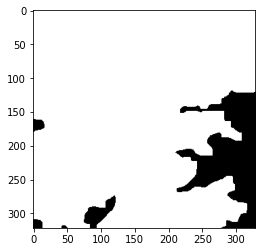

True

In [4]:
# erosion dilation 
# WARNING : important edge case is when your skeleton has a loop in it, this may mess up all of the algorithms pretty bad 

# path to image
path = r'../../MAPS/Map_originals/Ibrahim_Test/ibrahim_test_bw.png'
image = open_image(path)
option = 2 # 1 = erode first 2 = dialate first 
num_erosions = 4
num_dilations = 4

e_d_image  = erosion_dilation_from_array(image,option,num_erosions,num_dilations)

show_image(e_d_image)
cv2.imwrite('e_d_image.png', e_d_image)



In [5]:
# skeletonize 
med_axis , skeleton , skeleton_lee , thinned , thinned_partial = jasons_skeletonize_from_array(e_d_image)

skeletons = [med_axis , skeleton , skeleton_lee , thinned]

In [6]:
#try and preprocess the skeletons a bit and trim edges
trimmed_skeletons = []
weight_threshold = 20
for skel in skeletons:
    
    
    # option = 2 # 1 = erode first 2 = dialate first 
    # num_erosions = 1
    # num_dilations = 1

    # skel  = erosion_dilation_from_array(skel,option,num_erosions,num_dilations)
    # show_image(skel)
    
    cv2.imwrite('temp_skel_img.png', skel)

    new_array , new_image = trim_edges('temp_skel_img.png',weight_threshold)
    trimmed_skeletons.append(new_image)

No errors detected
No errors detected
No errors detected
No errors detected


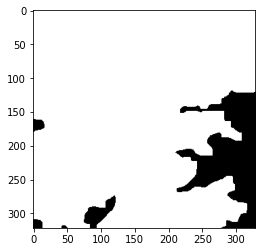

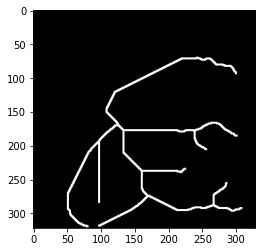

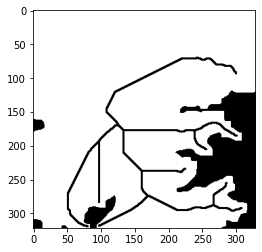

In [7]:
#overlay boundary and skeleton image

image1 = e_d_image

image2 = np.uint8((trimmed_skeletons[3]>0)*255) # grab medial axis 

# image2 = (trimmed_skeletons[3]>0)# grab medial axis 

option = 2 # 1 = erode first 2 = dialate first 
num_erosions = 0
num_dilations = 1

# inputs = path to image, erode first (1) or dialate first (2) .desired number of erosions, desired number of dialations 
# outputs = eroded then dialated image
dialated_skeleton = erosion_dilation_from_array(image2,option,num_erosions,num_dilations)

show_image(image1)
show_image(dialated_skeleton)

cv2.imwrite( "medial_axis_inverse_skeleton.png", new_image*255 )

make_negative_1 = False
make_negative_2 = True

new_image = overlay_images (image1,dialated_skeleton,make_negative_1, make_negative_2)

show_image(new_image)

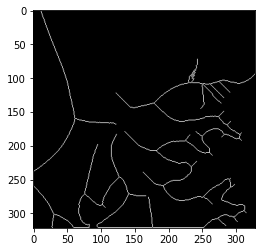

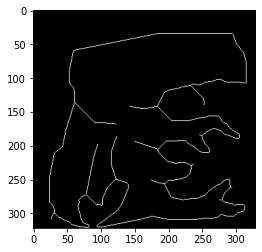

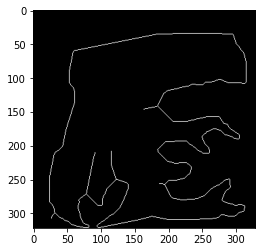

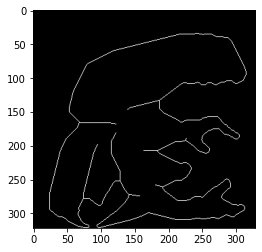

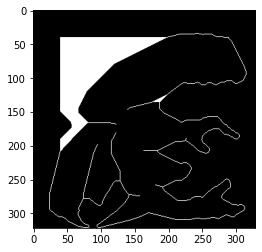

True

In [8]:
# lotsa_inverse_skeletons = []
# #inverse skeletonize trimmed graphs 
# for trim_skel in trimmed_skeletons:


#     med_axis , skeleton , skeleton_lee , thinned , thinned_partial = inverse_skeletonize_from_array(trim_skel)

#     inverse_skeletons = [med_axis , skeleton , skeleton_lee , thinned]

#     lotsa_inverse_skeletons.append(inverse_skeletons)

# med_axis , skeleton , skeleton_lee , thinned , thinned_partial = inverse_skeletonize_from_array(new_array)
new_image = ( new_image > 0 ) *255
med_axis , skeleton , skeleton_lee , thinned , thinned_partial = jasons_skeletonize_from_array(new_image)
skels = [med_axis , skeleton , skeleton_lee , thinned , thinned_partial]
for s in skels:
    show_image(s)

# #try and preprocess the skeletons a bit and trim edges
# trimmed_skeletons = []
# weight_threshold = 42
# for skel in skeletons:
    
#     # option = 2 # 1 = erode first 2 = dialate first 
#     # num_erosions = 1
#     # num_dilations = 1

#     # skel  = erosion_dilation_from_array(skel,option,num_erosions,num_dilations)
#     # show_image(skel)
    
#     cv2.imwrite('temp_skel_img.png', skel)

#     new_array , new_image = trim_edges('temp_skel_img.png',weight_threshold)
#     trimmed_skeletons.append(new_image)


cv2.imwrite('thinned_circle_skeleton.png', thinned)


# weight_threshold = 300

# new_array , new_image = trim_edges('thinned_circle_skeleton.png',weight_threshold)
# show_image(new_image)

# cv2.imwrite('trimmed_thinned_circle_skeleton.png', new_image)


In [9]:
# HEY LOOK HERE THIS IS A MANUAL STEP 
# now remove a point manually where there is the launch point (from thinned circle skeleton)
    # this is so that there is an end point and start point near where you want to start aka a node


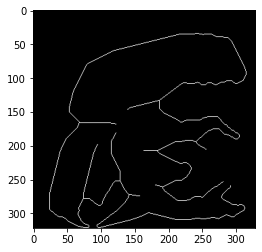

[(0, 1), (0, 2), (0, 5), (2, 17), (2, 3), (4, 10), (5, 9), (5, 7), (6, 17), (8, 9), (9, 14), (10, 17), (10, 15), (11, 14), (12, 14), (13, 15), (15, 16)]
done
/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Jupyter_pipelines/Pipeline_Circle_Path_Jul30/thinned_circle_skeleton.csv


In [10]:
#create csv file from zig zag full
name = 'thinned_circle_skeleton.csv'

path = r'../Pipeline_Circle_Path_Jul30/pixelremoved_thinned_circle_skeleton.png'
new_image = open_image(path)

show_image(new_image)

# new_image = (255-new_image) 
# new_image = new_image > 127 #make bool 
# print(new_image)

graph = skeleton_to_graph_from_array(new_image )

print(graph.edges())


path_to_csv = write_chinese_post_man_from_graph_csv(graph,name)

print(path_to_csv)


resolution: -8.610942249243486e-05 7.111801242236001e-05
 LONG, LAT:  -81.2253 34.02675
 upper LONGG, LAT:  -81.25002 34.0451
launching from : (287, 258)
starting node, distance, xy:  13 4.123105625617661 [291. 259.]


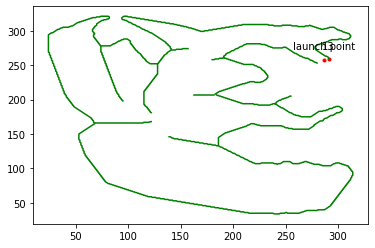

In [14]:
# make waypoints from the graph

path = r'pixelremoved_thinned_circle_skeleton.png'

image = open_image(path)


graph = skeleton_to_graph_from_array(image)
graph_original_image = graph

config_file  = r"ibrahim_config.wf" #config file 
launch_point = (34.02675, -81.2253)


circuit, graph = chinese_post_man_from_graph(graph,config_file,launch_point, path_to_csv)



In [15]:
#calulate the distance in meters of your graph 
from get_graph_distance import *

#take 2 arbitrary points 
waypoint1 = convert_xy_to_latlong(0, 0, config_file)
waypoint2 = convert_xy_to_latlong(0, 1, config_file)

#use those points to calculate distance ---- this could be streamlined by getting the arbitrary points inside get_graph_distance later 
total_distance, weight_sum , unit_distance = get_graph_distance(waypoint1,waypoint2,path)
print(total_distance, weight_sum , unit_distance )



total distance of graph at  pixelremoved_thinned_circle_skeleton.png  

(in meters) is 2621.7881283939296
2621.7881283939296 2179.4053377838827 1.2029832555424873


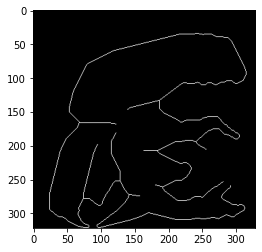

112.43220179290273 18.071144822260045 93360 1687122.080606198


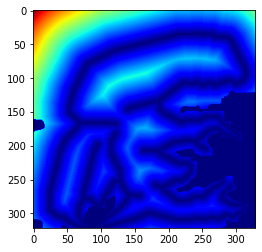

In [19]:
# Calculate MEAN DISTANCE TO SAMPLED POINT as well
from find_coverage_metrics_from_array import *

boundary_path = r'e_d_image.png' # can get these from earlier in the code instead 
zig_zag_path = r'pixelremoved_thinned_circle_skeleton.png'
boundary = open_image(boundary_path)
zig_zag = open_image(zig_zag_path) 
show_image(zig_zag)


max_distance,mean_distance,points_sum,distance_sum,distance_graph = find_coverage_metrics_from_array (boundary,zig_zag)

print(max_distance,mean_distance,points_sum,distance_sum)
plt.imshow(distance_graph, cmap=plt.cm.jet)
plt.savefig("heatmap.png")
plt.show()


<Figure size 432x288 with 0 Axes>

In [73]:
#create file of x,y coordinate points in the order of cpp 
f = open("coordinates.txt", "w")
# f.write()

edges = graph_original_image.edges()

# print(edges)
# print(graph_original_image[0][1])

# ps = graph[s][e]['pts']
# graph[s][e]['pts']

for e in circuit:
    # print(e)
    node0 = int(e[0])
    node1 = int(e[1])
    
    try: points = graph_original_image[node0][node1]['pts']
    except:points = graph_original_image[node1][node0]['pts']

    if len(points) == 0: print('error at' , edge)
    else: print(points)
    
    for pt in range(0,len(points)):
        f.write(str(points[pt][1]) + ',' + str(points[pt][0]) + '\n') # convert from y,x format to x,y format 
        # print(pt)
    
    
    points = []

f.close()

[[259 291]
 [260 291]
 [261 291]
 [262 290]
 [263 289]
 [263 288]
 [264 287]
 [265 286]
 [266 285]
 [267 284]
 [268 283]
 [269 282]
 [270 281]
 [271 280]
 [272 279]
 [273 279]
 [274 278]
 [275 278]
 [276 278]
 [277 278]
 [278 279]
 [279 280]
 [280 281]
 [280 282]
 [281 283]
 [281 284]
 [282 285]
 [282 286]
 [283 287]
 [283 288]
 [284 289]
 [284 290]
 [285 291]
 [286 292]
 [286 293]
 [287 294]
 [287 295]
 [287 296]
 [287 297]
 [287 298]
 [287 299]
 [287 300]
 [288 301]
 [288 302]
 [288 303]
 [287 304]
 [287 305]
 [287 306]
 [287 307]
 [287 308]
 [288 309]
 [288 310]
 [289 311]
 [290 311]
 [291 312]
 [292 312]
 [293 312]
 [294 311]
 [295 311]
 [296 310]
 [296 309]
 [297 308]
 [297 307]
 [298 306]
 [298 305]
 [299 304]
 [300 303]
 [300 302]
 [301 301]
 [301 300]
 [302 299]
 [303 298]
 [304 297]
 [305 296]
 [305 295]
 [305 294]
 [305 293]
 [305 292]
 [304 291]
 [304 290]
 [303 289]
 [303 288]
 [303 287]
 [302 286]
 [302 285]
 [302 284]
 [303 283]
 [303 282]
 [304 281]
 [304 280]
 [305 279]

In [75]:
#convert coordinates to waypoints 
from generate_waypoints import *

input_dir = ""
line_pttrn = "coordinates.txt" # coordinate file 
config_file_line = config_file #config file 

out_file_type = "c" #option = m (stands for mission palnner) or c (csv file)

generate_waypoints(input_dir + line_pttrn, input_dir + config_file_line, out_file_type)

out_file_type = "m" #option = m (stands for mission palnner) or c (csv file)

generate_waypoints(input_dir + line_pttrn, input_dir + config_file_line, out_file_type)


coordinates_waypoints.csv
